<a href="https://colab.research.google.com/github/Mochismo/LearnPython/blob/main/Twenyfirst_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Import dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression

Logistic Regression From Scratch

Initial data processing

In [13]:
class ScratchLogisticRegression():
  def __init__(self, num_iter=100, lr=0.01, bias=False, verbose=False):
    self.iter = num_iter
    self.lr = lr 
    self.bias = bias
    self.verbose = verbose
    self.lamda = 1/0.01
    self.loss = np.zeros(self.iter)
    self.val_loss = np.zeros(self.iter)
  
  def _check_for_bias(self, X):
    if self.bias == True:
      x1 = np.ones(X.shape[0])
    else:
      x1 = np.zeros(X.shape[0])
    return np.concatenate([x1.reshape(-1, 1), X], axis=1)

  def _sigmoid_function(self,X):
    linear_model = np.dot(X, self.W)

    return 1/(1 + np.exp(-linear_model))

  def _gradient_descent(self, X, error):
    self.tmp = np.append(0, np.ones(X.shape[1]-1))
    self.W -= self.lr*(np.dot(error, X) + self.tmp*self.lamda*self.W)/len(X)

  def _loss_function(self, y, y_pred):
    return np.mean(-y*np.log(y_pred) - (1-y)*np.log(1-y_pred)) + 0.5*self.lamda*np.mean(self.W[1:]**2)

  def fit(self, X, y, X_val=False, y_val=False):
    self.ylabel = np.unique(y)
    y = np.where(y==self.ylabel[0],0,1)

    if (type(y_val) != bool):
      y_val = np.where(y_val==self.ylabel[0],0,1)

    X = self._check_for_bias(X)

    self.W = np.random.rand(X.shape[1])

    for i in range (self.iter):
      y_pred = self._sigmoid_function(X)
      error = y_pred -y
      self.loss[y] = self._loss_function(y, y_pred)

      if (type(X_val) != bool):
        val_X = self._check_for_bias(X_val)
        val_ypred = self._sigmoid_function(val_x)

        self.val_loss[i] = self._loss_function(y_val, val_ypred)

      self._gradient_descent(X, error)

      if self.verbose:
        print('n_iter:', i, 'loss:', self.loss[i])
  def predict(self, X):
      X = self._check_for_bias(X)
      y_pred = self._sigmoid_function(X)
      return np.where(y_pred<0.5, self.ylabel[0], self.ylabel[1])

  def predict_proba(self, X):
      X = self._check_for_bias(X)
      self._sigmoid_function(X)
      return self._sigmoid_function(X)        

In [14]:
#import our dataset
iris = load_iris()
data = load_iris().data
target = load_iris().target.reshape(-1, 1)
iris = np.concatenate([data, target], axis=1)
iris = pd.DataFrame(iris)
X = iris.loc[iris[4]!=0,2:3].values
y = iris.loc[iris[4]!=0,4].values


In [15]:
# splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [16]:
#Standardize our data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = ScratchLogisticRegression(num_iter=1000, lr=0.01, verbose=True)
model.fit(X_train, y_train)
label_pred = model.predict(X_test)
proba_pred = model.predict_proba(X_test)

n_iter: 0 loss: 26.55173072812015
n_iter: 1 loss: 26.006835573484697
n_iter: 2 loss: 0.0
n_iter: 3 loss: 0.0
n_iter: 4 loss: 0.0
n_iter: 5 loss: 0.0
n_iter: 6 loss: 0.0
n_iter: 7 loss: 0.0
n_iter: 8 loss: 0.0
n_iter: 9 loss: 0.0
n_iter: 10 loss: 0.0
n_iter: 11 loss: 0.0
n_iter: 12 loss: 0.0
n_iter: 13 loss: 0.0
n_iter: 14 loss: 0.0
n_iter: 15 loss: 0.0
n_iter: 16 loss: 0.0
n_iter: 17 loss: 0.0
n_iter: 18 loss: 0.0
n_iter: 19 loss: 0.0
n_iter: 20 loss: 0.0
n_iter: 21 loss: 0.0
n_iter: 22 loss: 0.0
n_iter: 23 loss: 0.0
n_iter: 24 loss: 0.0
n_iter: 25 loss: 0.0
n_iter: 26 loss: 0.0
n_iter: 27 loss: 0.0
n_iter: 28 loss: 0.0
n_iter: 29 loss: 0.0
n_iter: 30 loss: 0.0
n_iter: 31 loss: 0.0
n_iter: 32 loss: 0.0
n_iter: 33 loss: 0.0
n_iter: 34 loss: 0.0
n_iter: 35 loss: 0.0
n_iter: 36 loss: 0.0
n_iter: 37 loss: 0.0
n_iter: 38 loss: 0.0
n_iter: 39 loss: 0.0
n_iter: 40 loss: 0.0
n_iter: 41 loss: 0.0
n_iter: 42 loss: 0.0
n_iter: 43 loss: 0.0
n_iter: 44 loss: 0.0
n_iter: 45 loss: 0.0
n_iter: 46 loss

In [18]:
accuracy = accuracy_score(y_test, label_pred)
precision = precision_score(y_test, label_pred, average='weighted')
recall = recall_score(y_test, label_pred, average='weighted')

print("-------------------")
print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)


-------------------
accuracy 0.95
precision 0.9545454545454545
recall 0.95


Decision Region

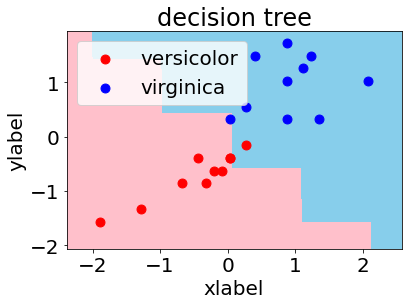

In [29]:
def decision_region(X, y, model, step=0.01, title='decision tree', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor','virginica']):
  #setting
  scatter_color = ['red', 'blue']
  contourf_color = ['pink', 'skyblue']
  n_class = 2
  # pred
  mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5))
  mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
  y_pred = model.predict(mesh).reshape(mesh_f0.shape)
  #plot
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
  #plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors ='y', linewidths =3, alpa =0.5)
  for i, target in enumerate(set(y)):
    plt.scatter(X[y==target][:, 0], X[y==target][:,1], s=80, color = scatter_color[i], label=target_names[i], marker='o')
  patches = [mpatches.Patch(color=scatter_color[i], label = target_names[i]) for i in range(n_class)]
  plt.legend(handles=patches)
  plt.legend()
  plt.show() 
decision_region(X_test, y_test, model)   

np.savez

you can save your values in a file if you want to use them again,you can pickle
https://docs.python.org/ja/3/library/pickle.html

Or numpy.savez https://numpy.org/doc/stable/reference/generated/numpy.savez.html
 

In [20]:
from tempfile import TemporaryFile

outfile = TemporaryFile()
np.savez(outfile, model.W)

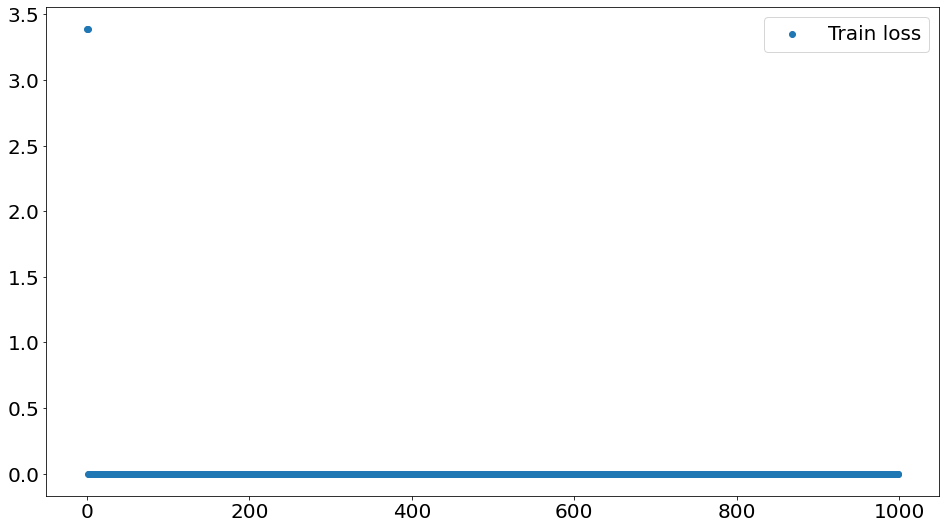

In [21]:
# Plotting losses
fig, ax = plt.subplots(figsize=(16, 9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(model.loss)), model.loss, label='Train loss')
plt.legend();